In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
    
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [179]:
titanic_data = pd.read_csv('C:/Users/filip/ML/static/Titanick/train.csv')

In [180]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [182]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [183]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [184]:
X = pd.get_dummies(X)

In [145]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [185]:
y = titanic_data.Survived

In [147]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [186]:
X =  X.fillna({'Age': X.Age.median()})

In [29]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

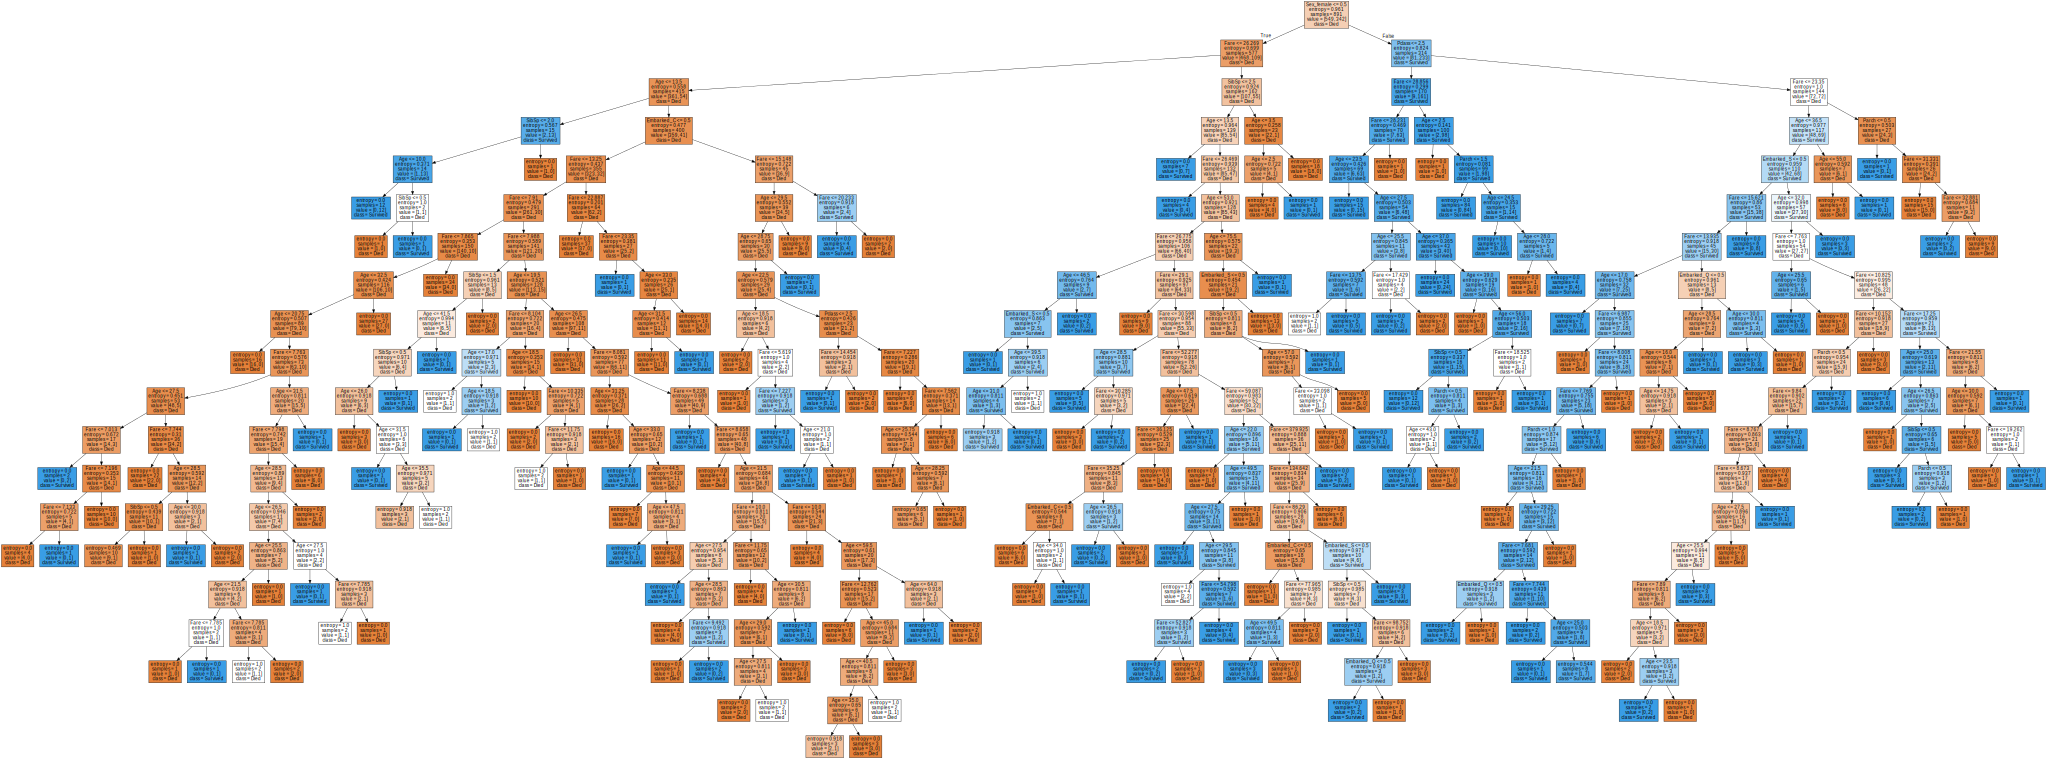

In [40]:
graph = Source(tree.export_graphviz(clf, out_file=None,\
                                    feature_names=list(X),\
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [42]:
clf.score(X,y)

0.9797979797979798

In [44]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
clf.score(X_train,y_train)

0.9798657718120806

In [47]:
clf.score(X_test,y_test)

0.7830508474576271

In [52]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [53]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [54]:
clf.score(X_train,y_train)

0.8238255033557047

In [57]:
clf.score(X_test,y_test)

0.8203389830508474

In [84]:
scores_data = pd.DataFrame()

In [61]:
max_depth_values = range(1, 100)

In [85]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()    
    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth], 
         'train_score': [train_score], 
         'test_score': [test_score],
        'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scor

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scor

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\820014335.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scor

In [89]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392
...,...,...,...,...
0,95,0.979866,0.779661,0.770182
0,96,0.979866,0.759322,0.768501
0,97,0.979866,0.762712,0.768487
0,98,0.979866,0.776271,0.766821


In [90]:
scores_data_long = pd.melt(scores_data,\
                           id_vars=['max_depth'],\
                           value_vars=['train_score', 'test_score', 'cross_val_score'],\
                           var_name='set_type',\
                           value_name='score')

In [91]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.770182
293,96,cross_val_score,0.768501
294,97,cross_val_score,0.768487
295,98,cross_val_score,0.766821


<AxesSubplot: xlabel='max_depth', ylabel='score'>

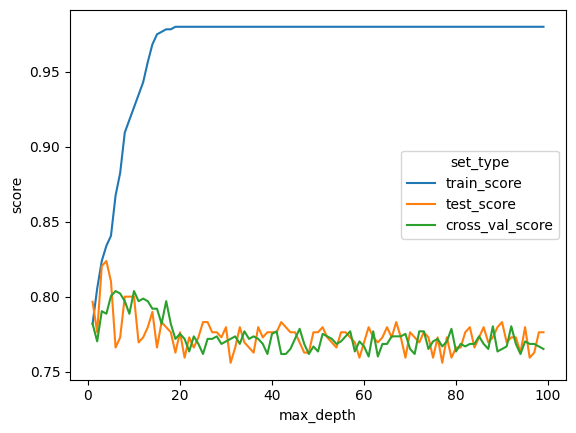

In [92]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [95]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.802059
205,8,cross_val_score,0.797003
206,9,cross_val_score,0.788585
207,10,cross_val_score,0.803711


In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [83]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [96]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [97]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [98]:
best_clf.score(X_test, y_test)

0.8

In [143]:
rs = np.random.seed(0)

In [144]:
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [145]:
X_test = iris_test.drop(['species'], axis=1)

In [146]:
y_test = iris_test.species

In [147]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)

In [148]:
iris_train

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [149]:
X_train = iris_train.drop(['species'], axis=1)
X_train

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5
...,...,...,...,...
147,6.5,3.0,5.2,2.0
124,6.7,3.3,5.7,2.1
123,6.3,2.7,4.9,1.8
146,6.3,2.5,5.0,1.9


In [150]:
y_train = iris_train.species
y_train

130    2
7      0
11     0
142    2
109    2
      ..
147    2
124    2
123    2
146    2
68     1
Name: species, Length: 100, dtype: int64

In [151]:
scores_data = pd.DataFrame()

In [152]:
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()    
    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth], 
         'train_score': [train_score], 
         'test_score': [test_score],
        'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\4226652029.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

In [153]:
scores_data_long = pd.melt(scores_data,\
                           id_vars=['max_depth'],\
                           value_vars=['train_score', 'test_score', 'cross_val_score'],\
                           var_name='set_type',\
                           value_name='score')

<AxesSubplot: xlabel='max_depth', ylabel='score'>

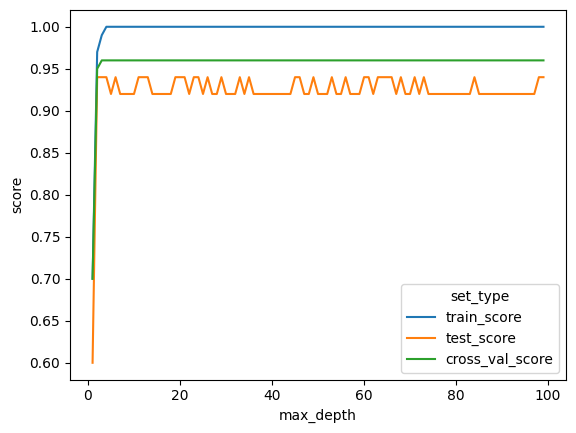

In [154]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [171]:
test_data = pd.read_json('C:/Users/filip/ML/static/Titanick/dataset_209691_15.txt')
test_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,22,26.4,1,1,0
1,29,34.8,1,1,0
2,17,20.4,1,1,0
3,19,22.8,1,1,0
4,27,32.4,1,1,0
...,...,...,...,...,...
95,12,4.8,1,0,1
96,9,3.6,1,0,1
97,13,5.2,1,0,1
98,13,5.2,1,0,1


In [155]:
dogs_n_cats = pd.read_csv('C:/Users/filip/ML/static/Titanick/dogs_n_cats.csv')

In [157]:
dogs_n_cats.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [158]:
X = pd.get_dummies(dogs_n_cats)

In [168]:
X

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1
...,...,...,...,...,...,...,...
995,8,3.2,1,0,1,1,0
996,7,2.8,1,0,1,1,0
997,6,2.4,1,0,1,1,0
998,7,2.8,1,0,1,1,0


In [172]:
X_train = X.drop(['Вид_котик', 'Вид_собачка'], axis=1)
X_train

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [173]:
y_train = X['Вид_собачка']
y_train

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Вид_собачка, Length: 1000, dtype: uint8

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33)

NameError: name 'X_train' is not defined

In [175]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()    
    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth], 
         'train_score': [train_score], 
         'test_score': [test_score],
        'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
scores_data_long = pd.melt(scores_data,\
                           id_vars=['max_depth'],\
                           value_vars=['train_score', 'test_score', 'cross_val_score'],\
                           var_name='set_type',\
                           value_name='score')

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\filip\AppData\Local\Temp\ipykernel_19900\2749185518.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

In [177]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0
...,...,...,...
292,95,cross_val_score,1.0
293,96,cross_val_score,1.0
294,97,cross_val_score,1.0
295,98,cross_val_score,1.0


<AxesSubplot: xlabel='max_depth', ylabel='score'>

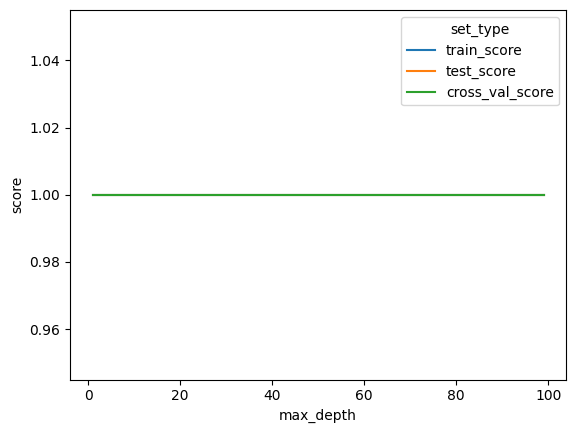

In [180]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [187]:
dogs_n_cats = pd.read_csv('C:/Users/filip/ML/static/Titanick/dogs_n_cats.csv')
X = pd.get_dummies(dogs_n_cats)
X_train = X.drop(['Вид_котик', 'Вид_собачка'], axis=1)
y_train = X['Вид_собачка']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33)
scores_data = pd.DataFrame()
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)



In [190]:
test_data = pd.read_json('C:/Users/filip/ML/static/Titanick/dataset_209691_15.txt')

In [191]:
result = clf.predict(test_data)
pd.Series(result)[result == 1].count()

54

In [1]:
from sklearn.model_selection import GridSearchCV

In [ ]:
result = clf.predict(X_ts)
pd.Series(result)[result == 'собачка'].count()

In [3]:
15/(15+30)

0.3333333333333333

In [6]:
30/(30+70)

0.3

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
clk = tree.DecisionTreeClassifier()

In [190]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth':range(1,30)}

In [191]:
grid_search_cv_clf = GridSearchCV(clk,parametrs, cv=5)

In [192]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [193]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [194]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [195]:
best_clf = grid_search_cv_clf.best_estimator_

In [196]:
best_clf.score(X_test, y_test)

0.7661016949152543

In [197]:
from sklearn.metrics import precision_score, recall_score

In [198]:
y_pred = best_clf.predict(X_test)

In [199]:
precision_score(y_test, y_pred)

0.7931034482758621

In [200]:
recall_score(y_test, y_pred)

0.575

In [201]:
y_predicted_prob = best_clf.predict_proba(X_test)

<AxesSubplot: >

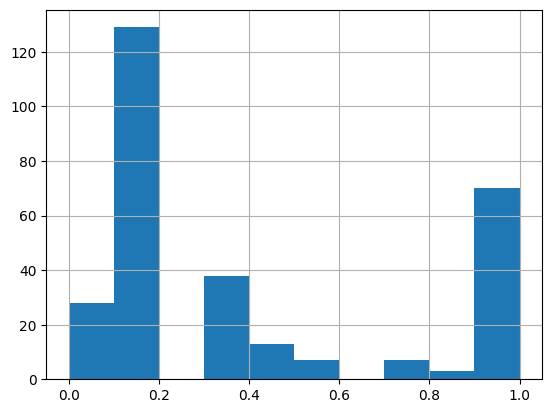

In [202]:
pd.Series(y_predicted_prob[:,1]).hist()

In [203]:
import numpy as np

In [177]:
y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1,0)

In [170]:
precision_score(y_test, y_pred)

ValueError: Mix of label input types (string and number)

In [171]:
recall_score(y_test, y_pred)

ValueError: Mix of label input types (string and number)

In [204]:
lw = 5

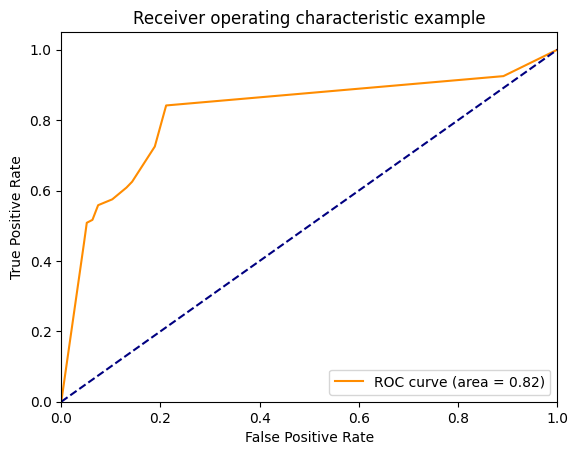

In [205]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [11]:
train_data_tree = pd.read_csv('C:/Users/filip/ML/static/train_data_tree.csv')

In [12]:
train_data_tree

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [14]:
X = train_data_tree.drop('num', axis=1)

In [15]:
y = train_data_tree.num

In [35]:
from sklearn.model_selection import train_test_split

X_train = train_data_tree.drop('num', axis=1)
y_train = train_data_tree.num

In [19]:
from sklearn.metrics import precision_score, recall_score

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [37]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

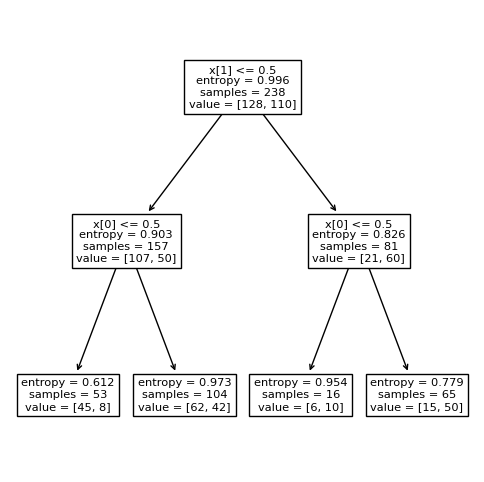

In [38]:
fig, ax = plt.subplots(figsize=(6, 6)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax)
plt.show()

In [40]:
0.996 - (0.903*157 + 0.826*81)/(81+157)

0.11920588235294105

In [25]:
from sklearn import tests

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [47]:
from sklearn.model_selection import GridSearchCV
dt = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['entropy'],
             'max_depth': range(1,10),
             'min_samples_split': range(2,10),
             'min_samples_leaf': range(1,10)}
search = GridSearchCV(dt, parametrs, cv=5)
search.fit(X_train, y_train)
predicted = dt.predict(X_test)
best_tree = search.best_estimator_